In [126]:
import numpy as np                               #import packages numpy(for numerical analysis)
import pandas as pd                              #import packages pandas(to generate univariate analysis)
import sweetviz as sv
import matplotlib.pyplot as plt                  #import packages matplotlib(generating visualization with pyplot)
import seaborn as sns                            #import packages seaborn(plot statistical graphs in python)

import os,sys,warnings 
warnings.filterwarnings('ignore')                #standard libraries
from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [127]:
EA_train=pd.read_csv('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Employee Access Prediction/Project-6-Classification-Employee-Access-Prediction/ea_train.csv')    #read csv file using pandas
print('Data Shape:', EA_train.shape)

Data Shape: (24576, 11)


In [128]:
EA_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1


In [129]:
EA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ID                24576 non-null  int64
 10  ACTION            24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [130]:
EA_train.isna().sum()   

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
ACTION              0
dtype: int64

In [131]:
EA_train.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,16367.649292,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,9464.173852,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,8149.750000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,16403.500000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,24524.250000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,32768.000000,1.000000


In [132]:
EA_train.nunique()

RESOURCE             6469
MGR_ID               3996
ROLE_ROLLUP_1         123
ROLE_ROLLUP_2         168
ROLE_DEPTNAME         440
ROLE_TITLE            331
ROLE_FAMILY_DESC     2183
ROLE_FAMILY            64
ROLE_CODE             331
ID                  24576
ACTION                  2
dtype: int64

In [8]:
my_report = sv.analyze(EA_train)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [133]:
EA_train['ACTION'].value_counts()

1    23148
0     1428
Name: ACTION, dtype: int64

In [134]:
EA_train['MGR_ID'].value_counts()

770       111
2270       66
2594       63
1350       56
2014       54
         ... 
259734      1
46734       1
3705        1
99960       1
69630       1
Name: MGR_ID, Length: 3996, dtype: int64

In [135]:
EA_train['RESOURCE'].value_counts()

4675      638
79092     347
75078     321
25993     317
3853      295
         ... 
34121       1
79733       1
32086       1
73050       1
104679      1
Name: RESOURCE, Length: 6469, dtype: int64

In [136]:
EA_train['ROLE_FAMILY'].value_counts()

290919    8278
118424    2028
19721     2016
117887    1775
292795     968
          ... 
143398       3
254395       2
130364       2
149353       2
161100       1
Name: ROLE_FAMILY, Length: 64, dtype: int64

Shape of your Data Set loaded: (24576, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


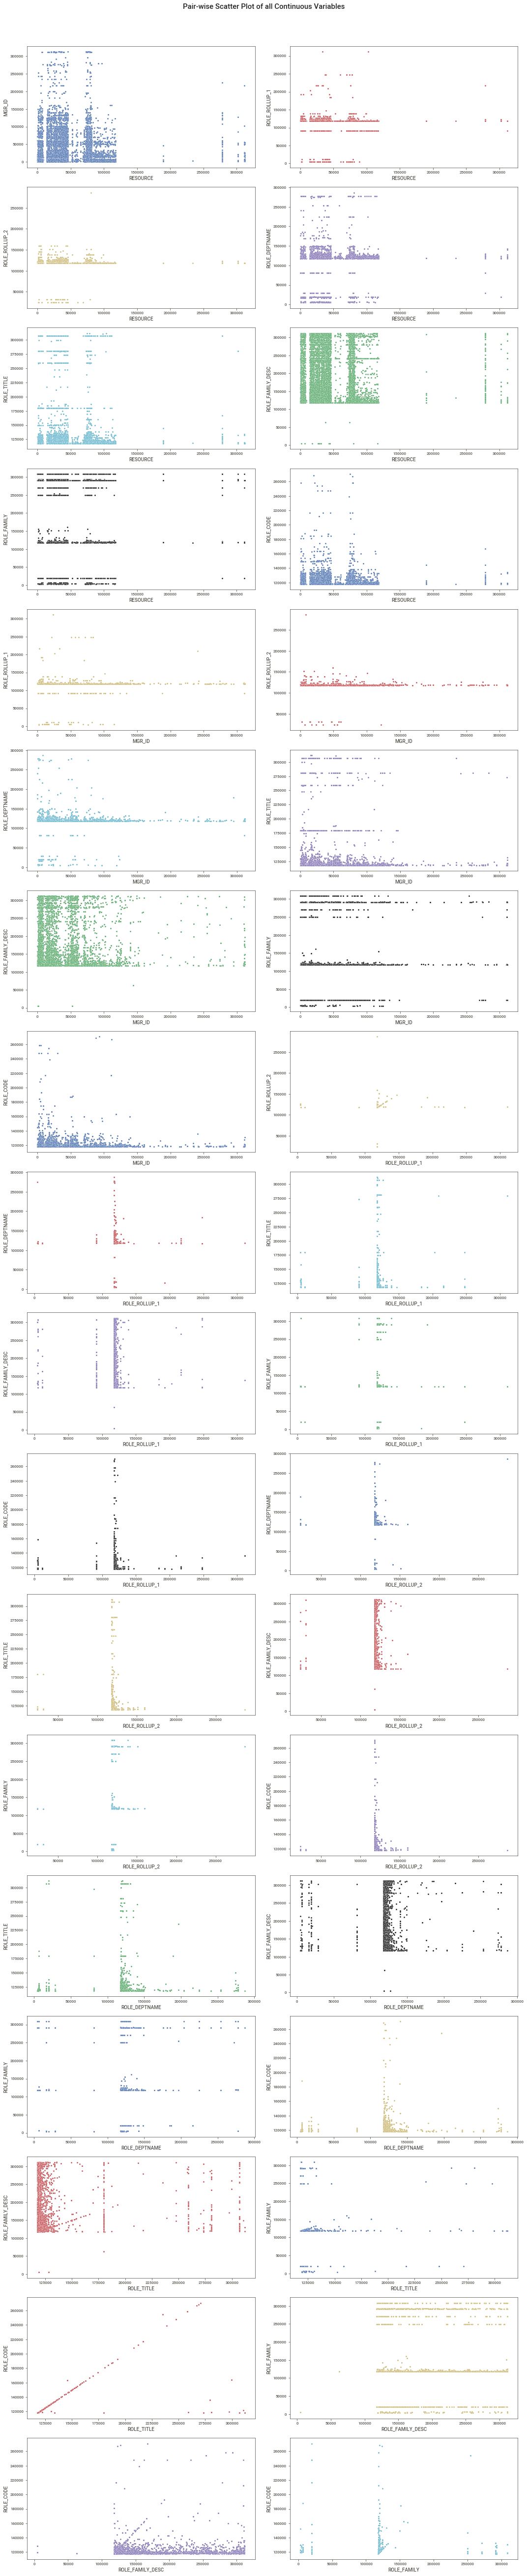

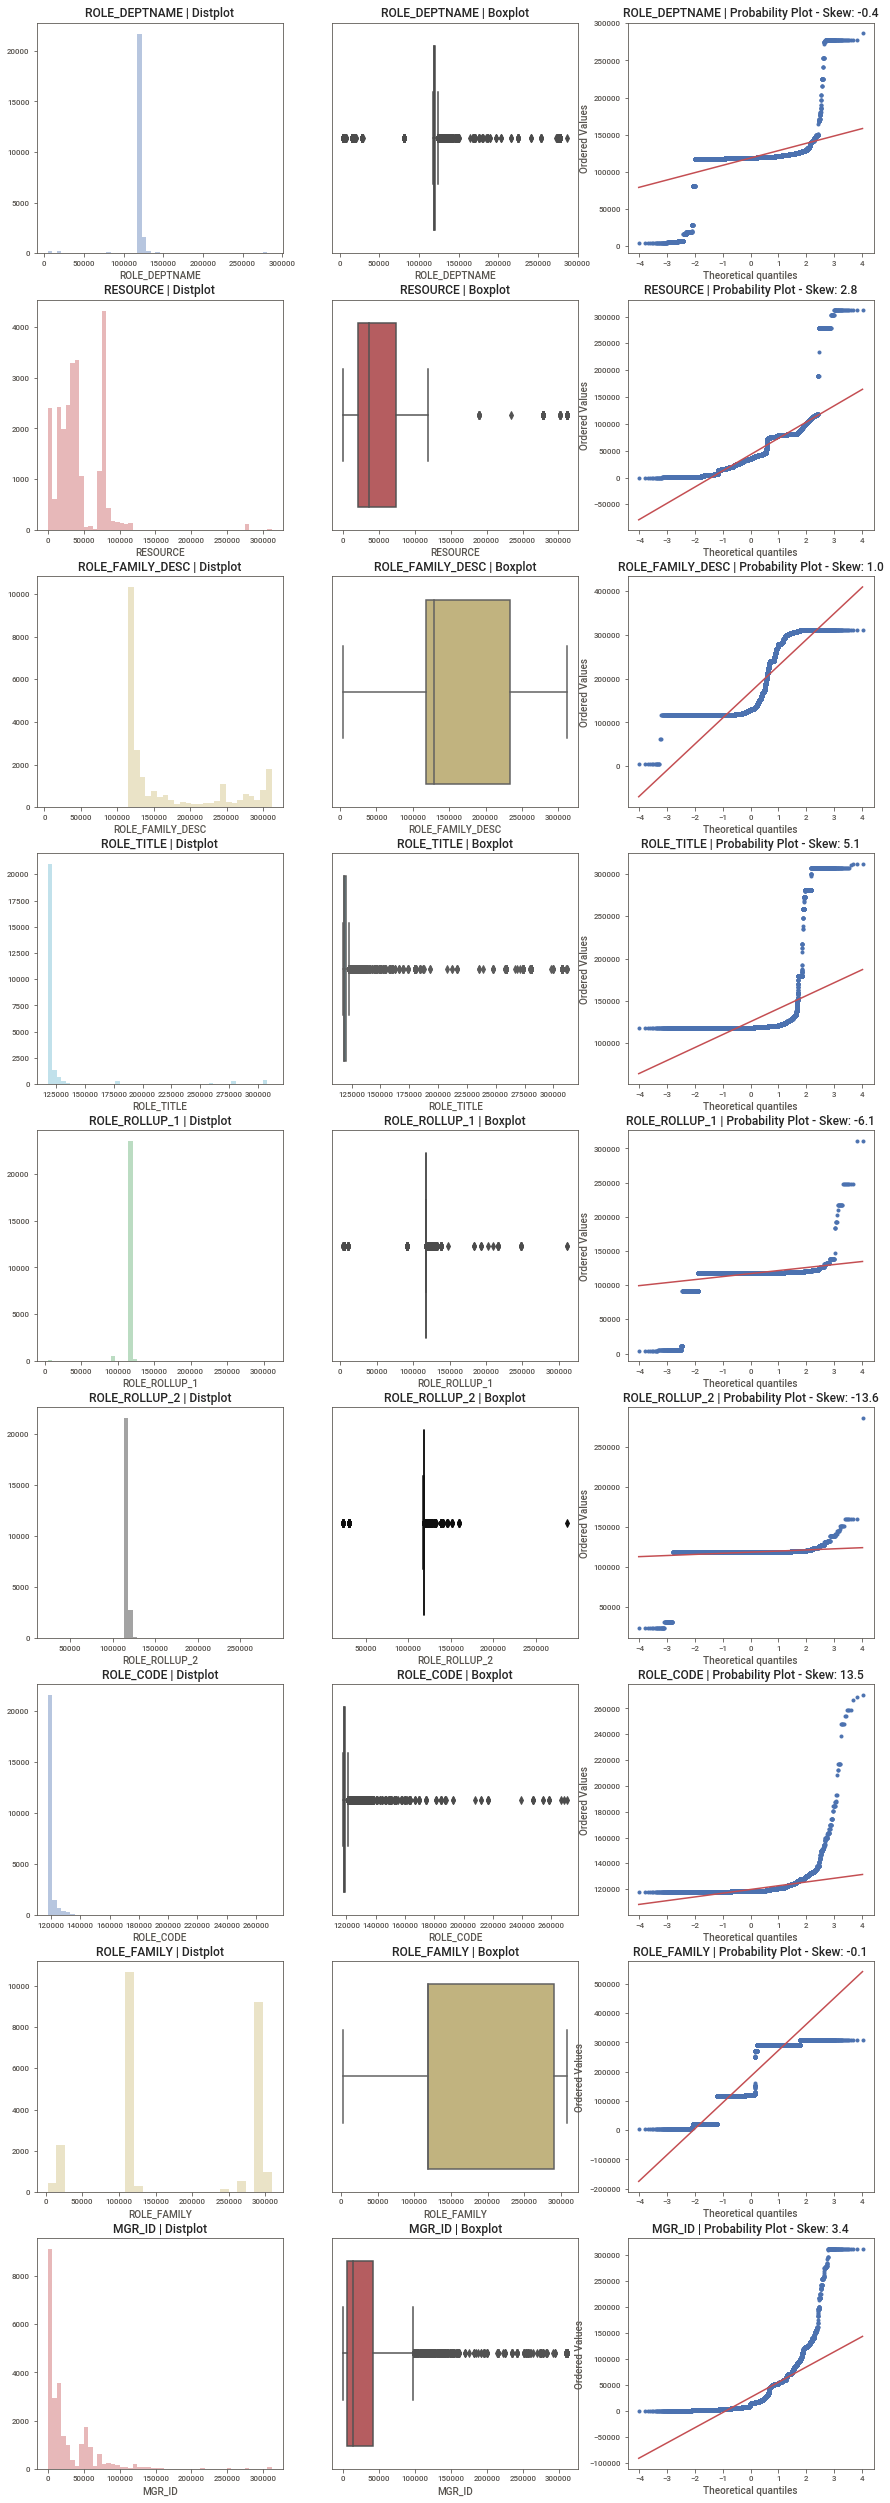

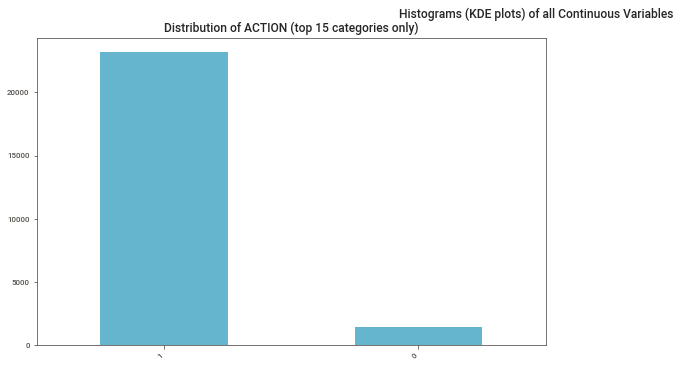

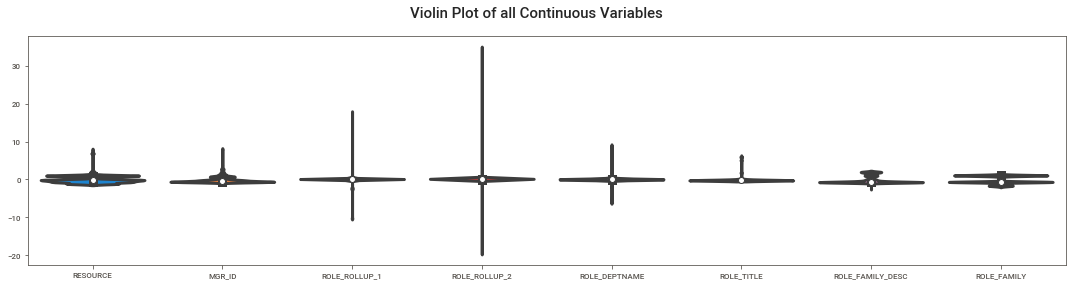

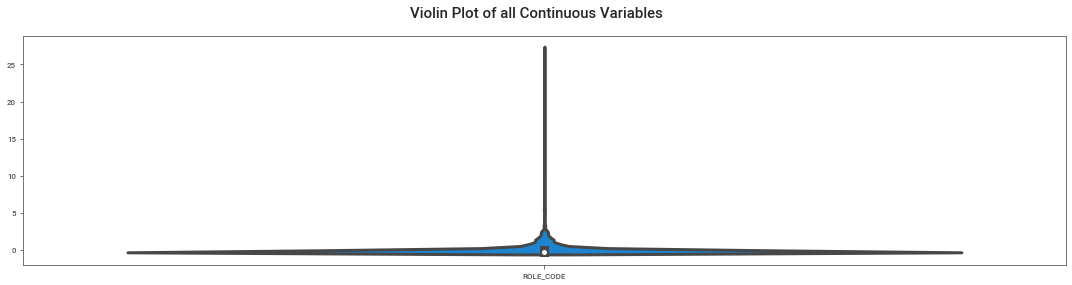

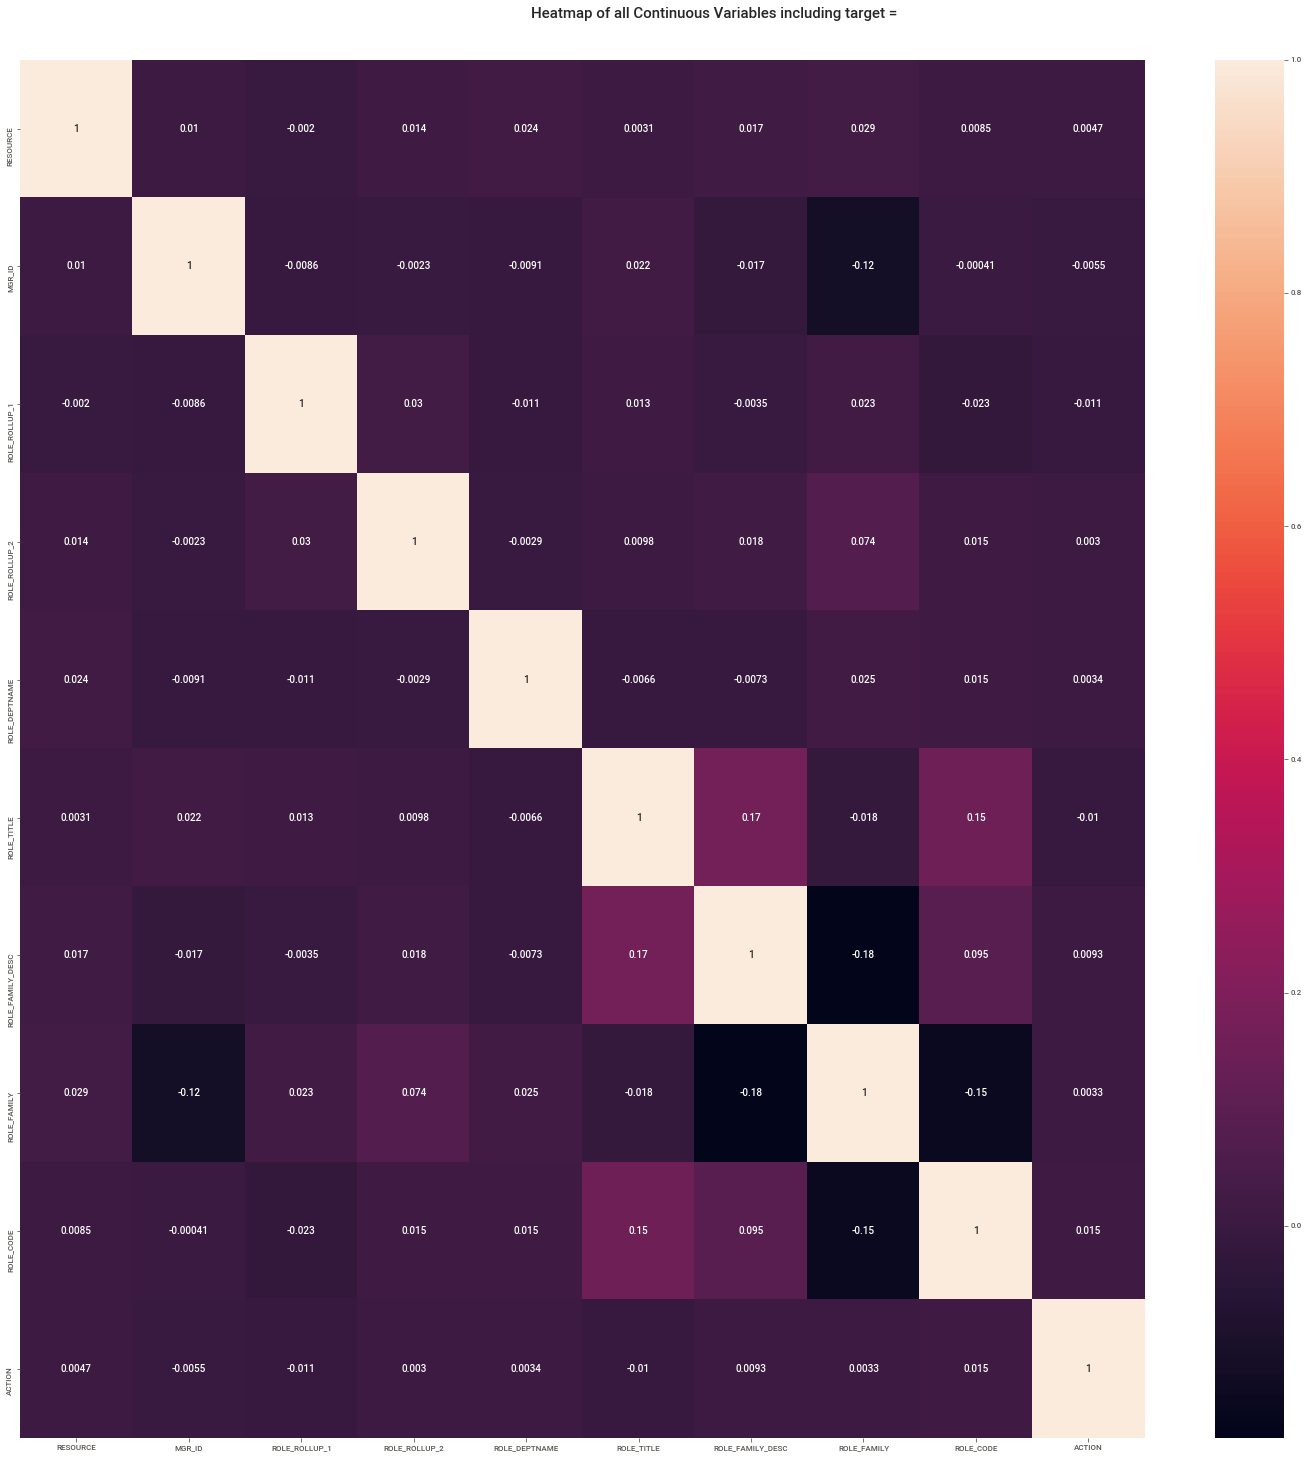

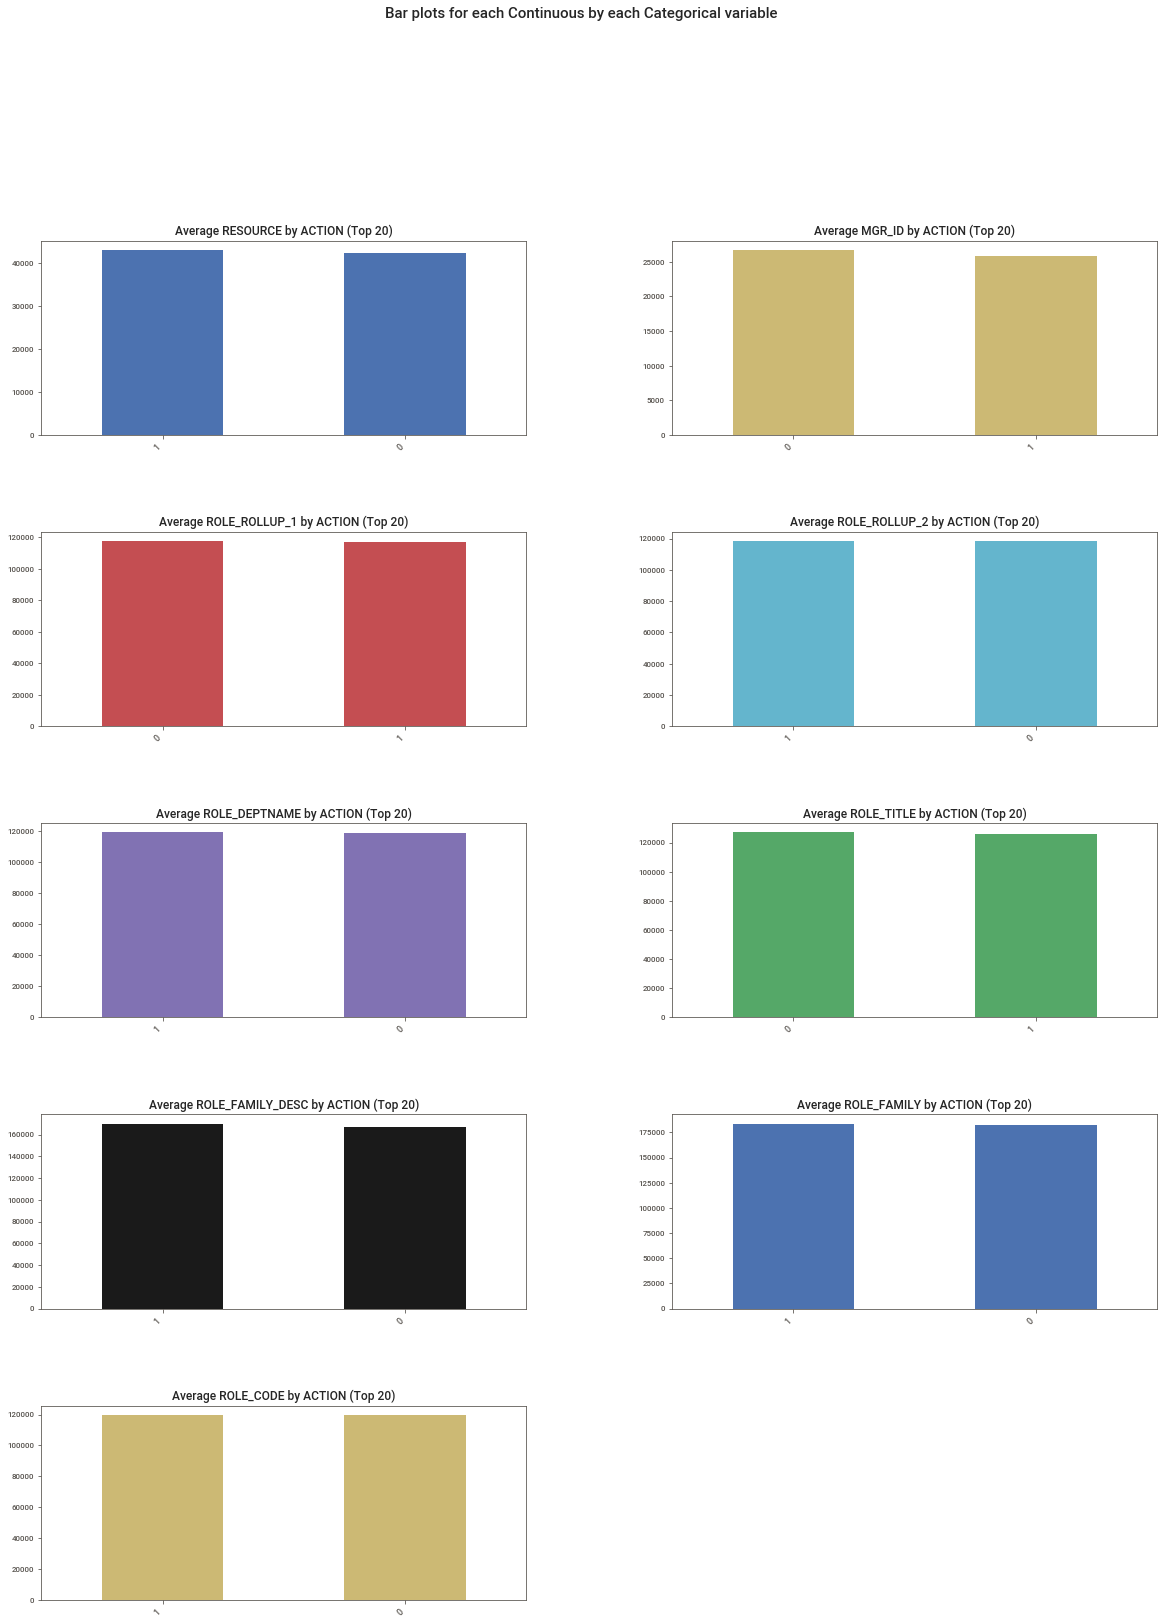

Time to run AutoViz (in seconds) = 11.491

 ###################### VISUALIZATION Completed ########################


In [137]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_train_av = AV.AutoViz('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Employee Access Prediction/Project-6-Classification-Employee-Access-Prediction/ea_train.csv')

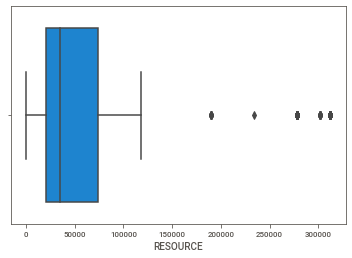

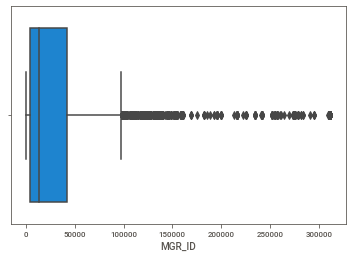

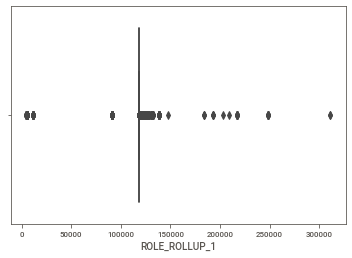

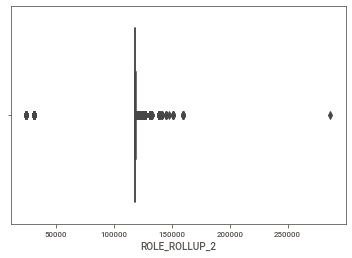

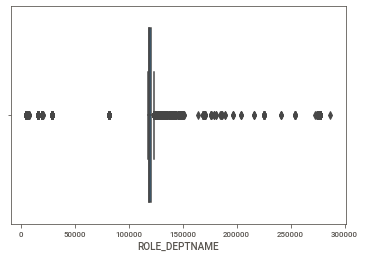

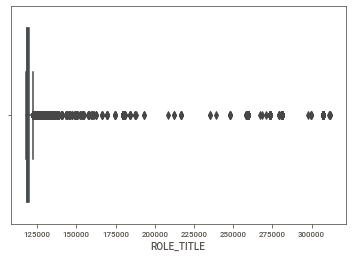

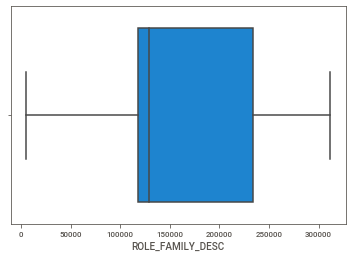

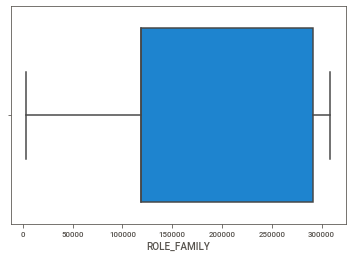

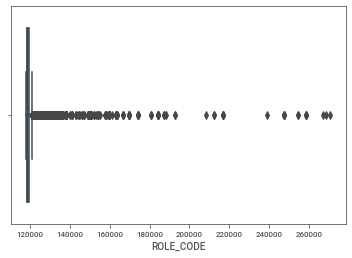

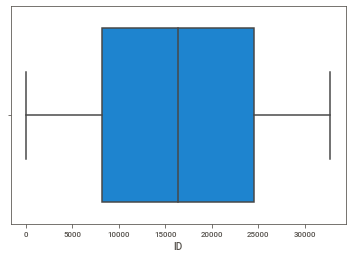

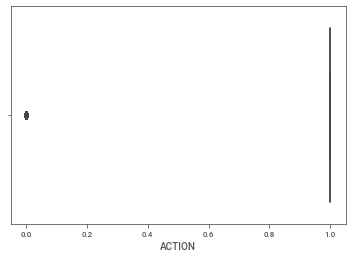

In [138]:
for i in EA_train.describe().columns:
    sns.boxplot(EA_train[i].dropna())
    plt.show()

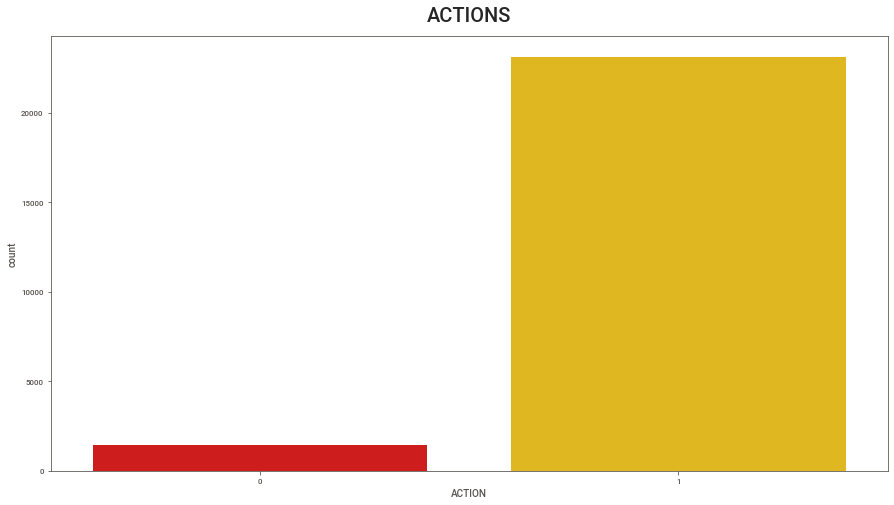

In [139]:
plt.figure(figsize=(15,8))
sns.countplot(x = EA_train.ACTION, palette="hot")
plt.title("ACTIONS", fontsize=20, y=1.02)
plt.show()

<AxesSubplot:>

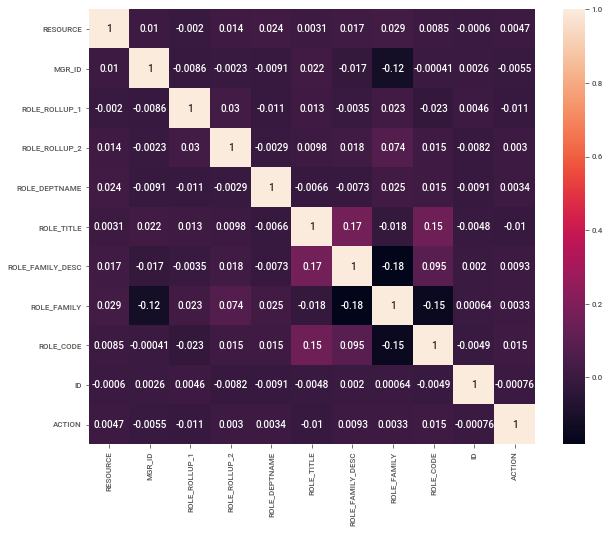

In [140]:
plt.figure(figsize=(10, 8))
sns.heatmap(EA_train.corr(), annot=True)

In [225]:
EA_test=pd.read_csv('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Employee Access Prediction/Project-6-Classification-Employee-Access-Prediction/ea_test.csv')    #read csv file using pandas
print('Data Shape:', EA_test.shape)
EA_test_copy=EA_test

Data Shape: (8193, 10)


In [200]:
EA_test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,37793,81744,117902,117903,118783,118451,130134,118453,118454,18245
1,40309,1541,117961,118225,123173,119093,123174,119095,119096,9226
2,27356,205,117961,118386,118746,118784,147114,290919,118786,27195
3,5173,8229,117961,118300,121305,119351,149246,3130,119353,6478
4,77207,51791,117961,119256,120943,118995,280788,292795,118997,4813


In [201]:
EA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          8193 non-null   int64
 1   MGR_ID            8193 non-null   int64
 2   ROLE_ROLLUP_1     8193 non-null   int64
 3   ROLE_ROLLUP_2     8193 non-null   int64
 4   ROLE_DEPTNAME     8193 non-null   int64
 5   ROLE_TITLE        8193 non-null   int64
 6   ROLE_FAMILY_DESC  8193 non-null   int64
 7   ROLE_FAMILY       8193 non-null   int64
 8   ROLE_CODE         8193 non-null   int64
 9   ID                8193 non-null   int64
dtypes: int64(10)
memory usage: 640.2 KB


In [144]:
EA_test.isna().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
dtype: int64

In [145]:
EA_test.nunique()

RESOURCE            3361
MGR_ID              2786
ROLE_ROLLUP_1        116
ROLE_ROLLUP_2        159
ROLE_DEPTNAME        403
ROLE_TITLE           289
ROLE_FAMILY_DESC    1408
ROLE_FAMILY           62
ROLE_CODE            289
ID                  8193
dtype: int64

In [146]:
EA_test['ROLE_ROLLUP_1'].equals(EA_test['ROLE_ROLLUP_2'])

False

In [23]:
EA_test.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,43052.257903,26274.717198,116944.400830,118424.599414,119087.121079,126680.039546,171132.508605,184019.463322,119861.774564,16433.046137
std,33908.886990,36466.978203,10647.139859,3540.439044,19895.419705,32607.026621,70042.923669,100269.513113,6411.225301,9446.834176
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,4.000000
25%,20299.000000,4576.000000,117961.000000,118102.000000,118395.000000,118278.000000,117913.000000,118363.000000,118261.000000,8283.000000
50%,35531.000000,13781.000000,117961.000000,118300.000000,118979.000000,118568.000000,128942.000000,118960.000000,118570.000000,16316.000000
75%,74166.000000,44022.000000,117961.000000,118386.000000,120551.000000,120006.000000,237245.000000,290919.000000,119194.000000,24722.000000
max,312153.000000,311696.000000,247952.000000,185842.000000,277693.000000,311867.000000,311867.000000,308574.000000,258436.000000,32767.000000


In [24]:
my_report = sv.analyze(EA_test)
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Shape of your Data Set loaded: (8193, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    10 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 45


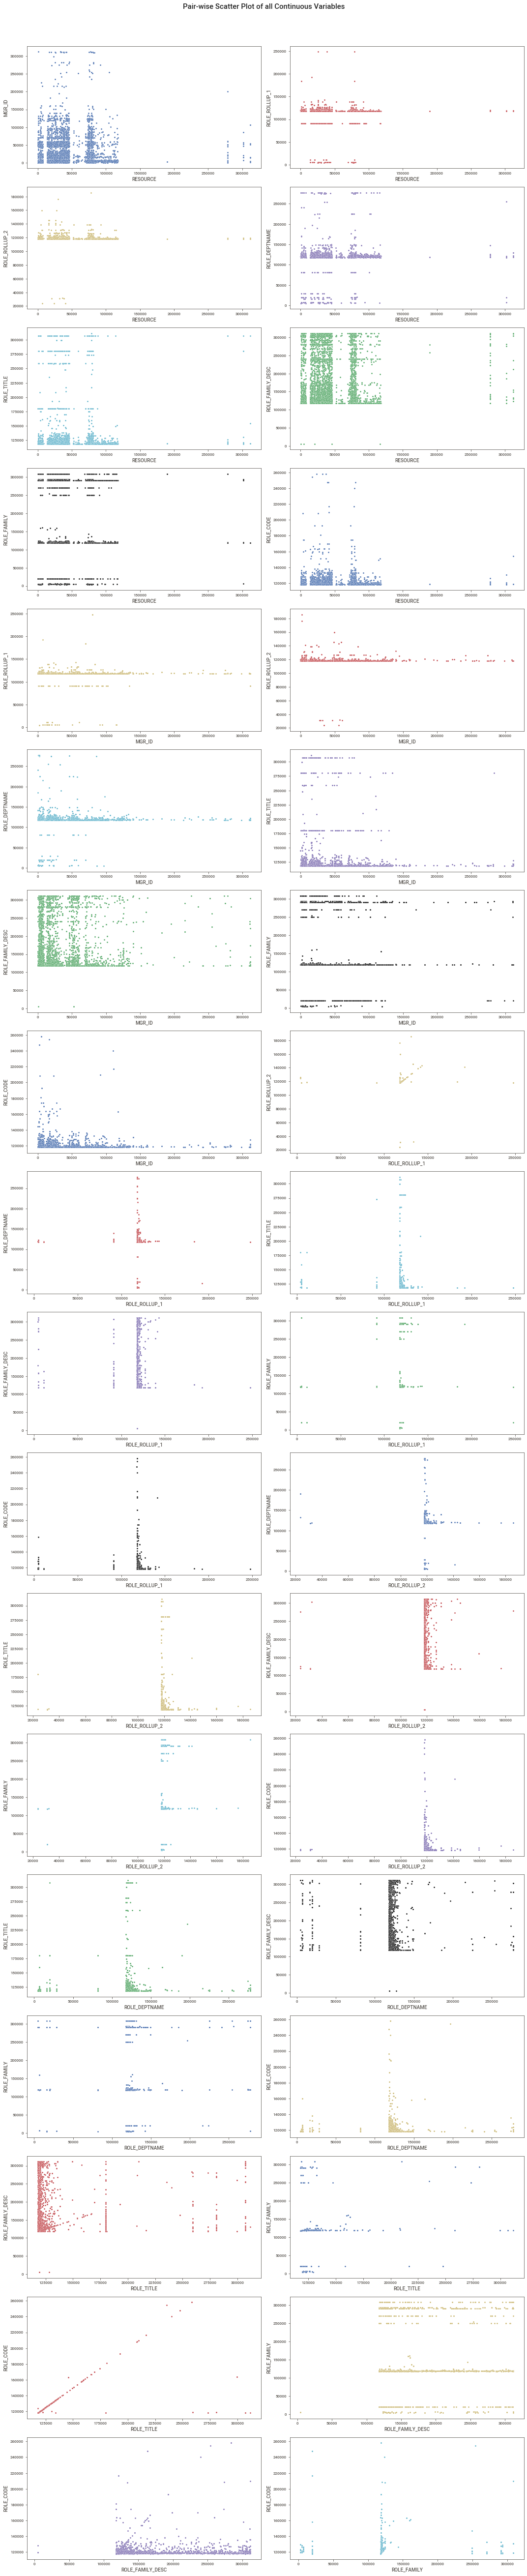

Could not draw Violin Plot


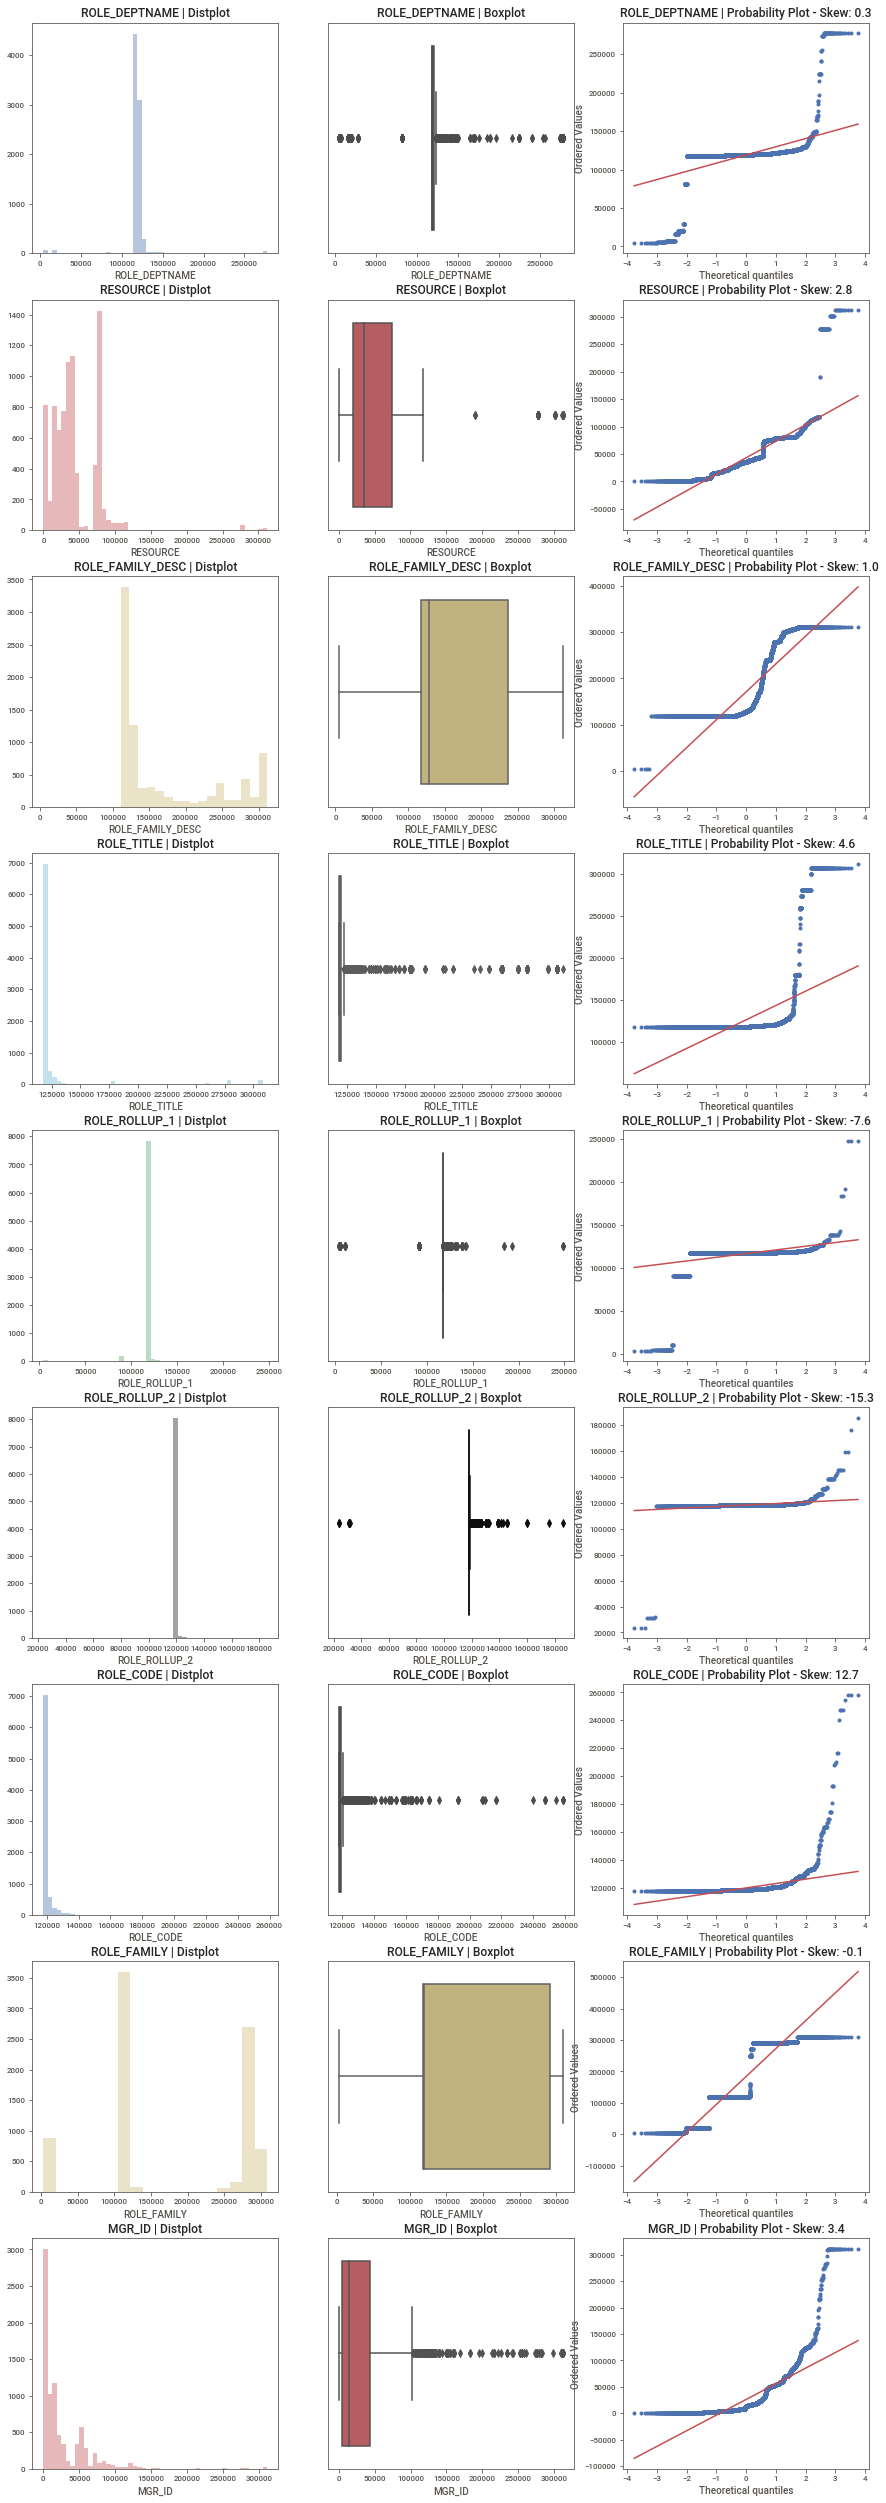

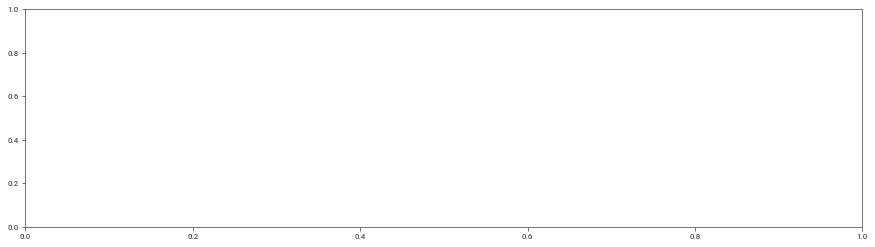

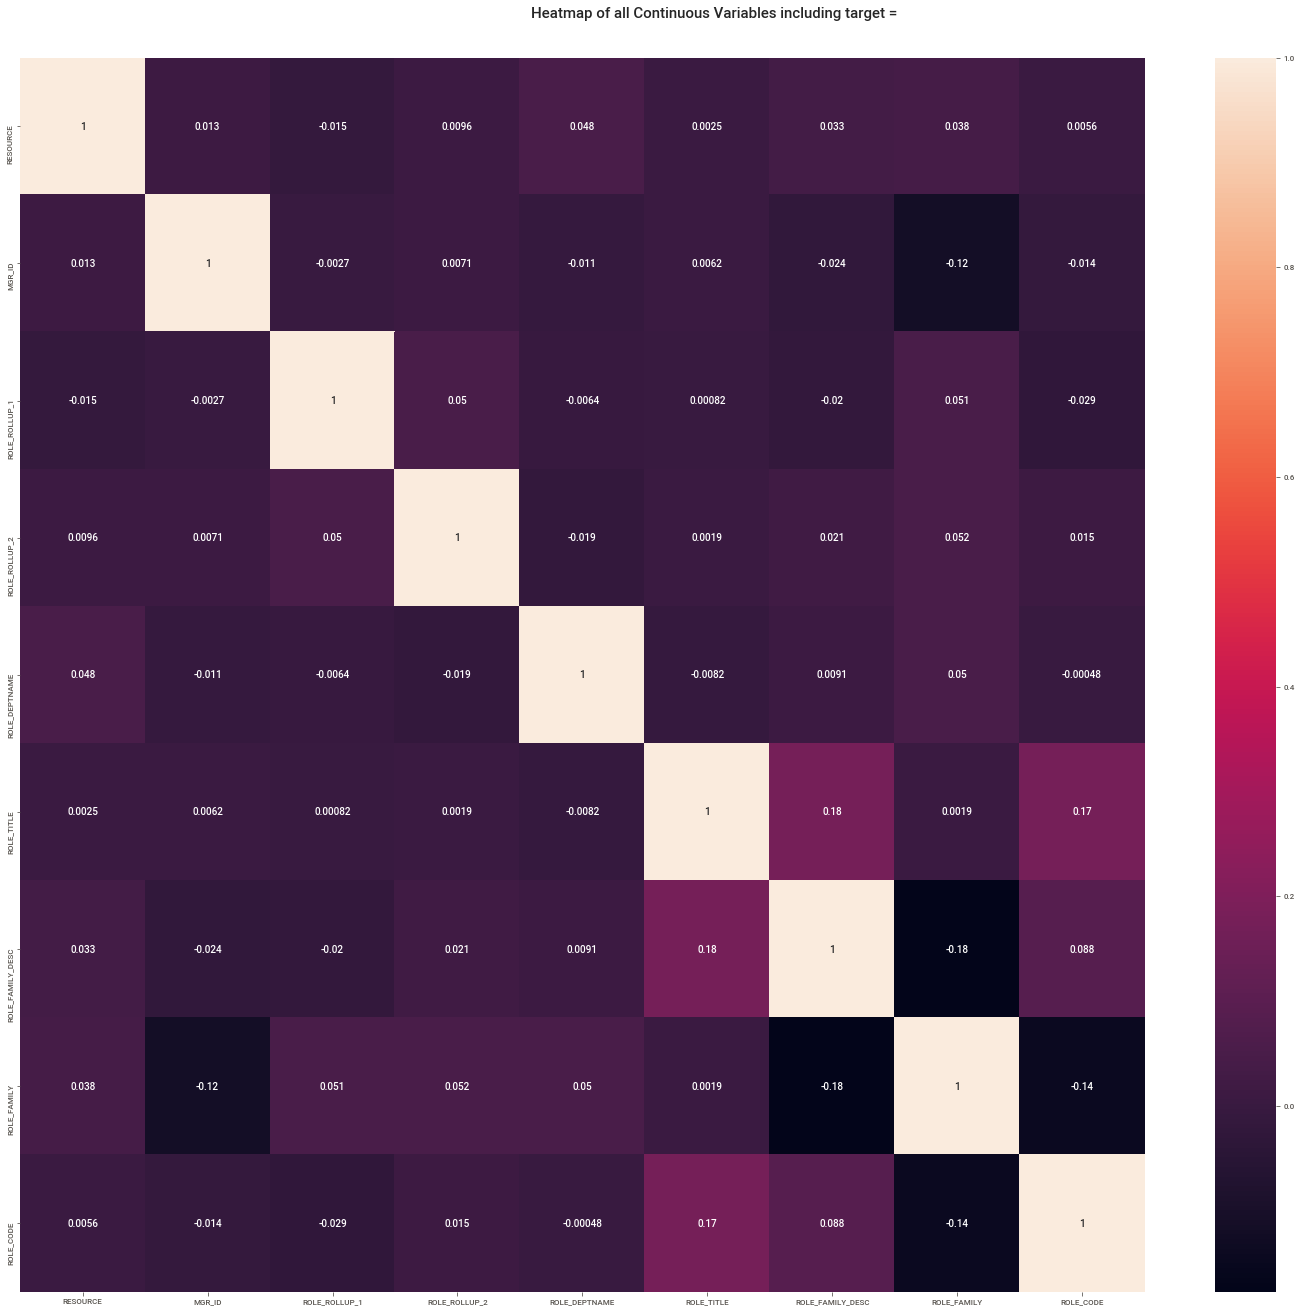

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 8.705

 ###################### VISUALIZATION Completed ########################


In [147]:
AV = AutoViz_Class()
df_test_av = AV.AutoViz('D:/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Employee Access Prediction/Project-6-Classification-Employee-Access-Prediction/ea_test.csv')

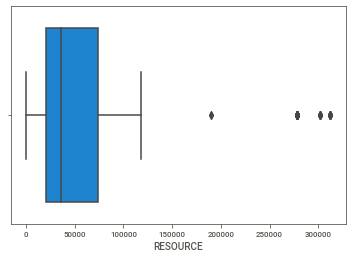

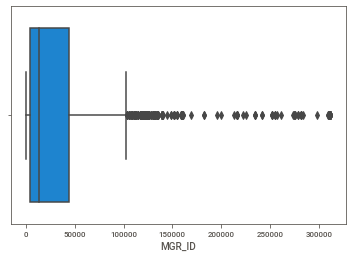

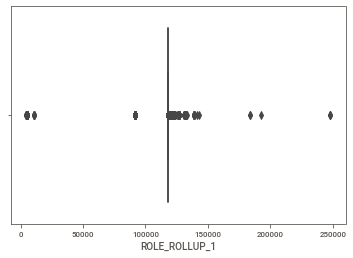

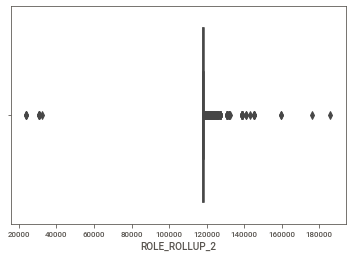

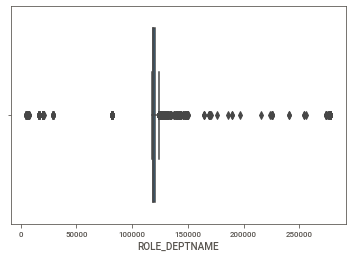

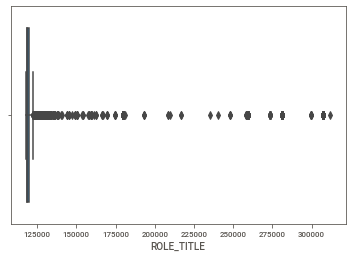

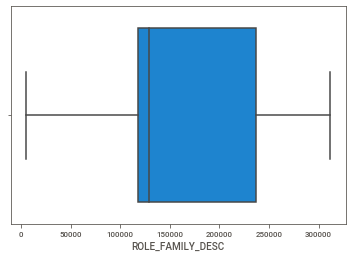

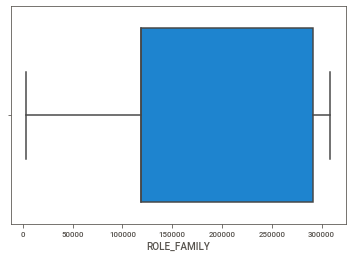

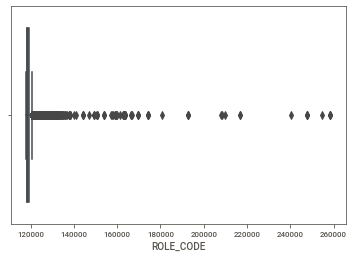

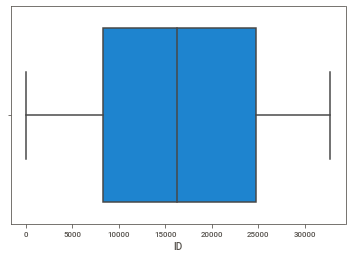

In [148]:
for i in EA_test.describe().columns:
    sns.boxplot(EA_test[i].dropna())
    plt.show()

<AxesSubplot:>

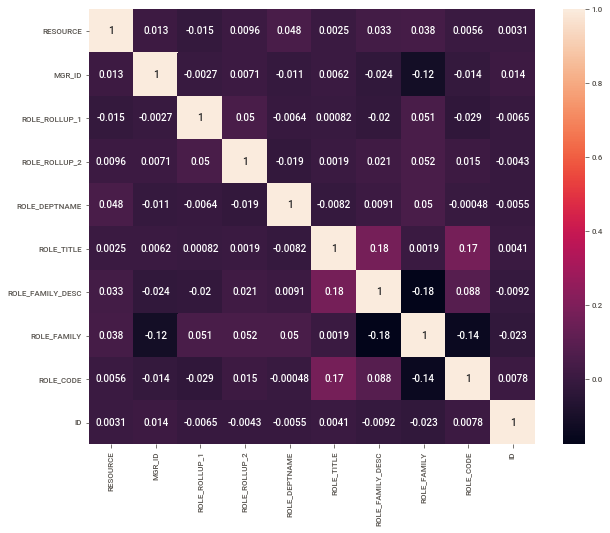

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(EA_test.corr(), annot=True)

In [194]:
X = EA_train.drop("ACTION", axis=1)
Y = EA_train["ACTION"]

In [195]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703


In [196]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: ACTION, dtype: int64

In [197]:
print('X_train shape:' , X.shape)
print('Y_train shape:' , Y.shape)

X_train shape: (24576, 10)
Y_train shape: (24576,)


In [155]:
X_test = EA_test
print('X_test shape:' , X_test.shape)

X_test shape: (8193, 10)


In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70,test_size=0.30, random_state=0)

LOGISTIC REGRESSION

In [157]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,Y_train)

LogisticRegression()

In [158]:
Y_pred_train = logreg_model.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
LRAcc = accuracy_score(Y_train, Y_pred_train)
print('Logistic Regression Train accuracy is: {:.2f}%'.format(LRAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the train data is  0.9426844155089229
Logistic Regression Train accuracy is: 94.27%


In [159]:
Y_pred_test = logreg_model.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
LRAcc = accuracy_score(Y_test, Y_pred_test)
print('Logistic Regression Test accuracy is: {:.2f}%'.format(LRAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9400515394005154
Logistic Regression Test accuracy is: 94.01%


DECISSION TREE

In [160]:
dtc_model = DecisionTreeClassifier(criterion='gini')
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [161]:
Y_pred_train = dtc_model.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
DTAcc = accuracy_score(Y_train, Y_pred_train)
print('Decission Tree Train accuracy is: {:.2f}%'.format(DTAcc*100))

[1 1 1 ... 1 0 1]
Accuracy score of the train data is  1.0
Decission Tree Train accuracy is: 100.00%


In [162]:
Y_pred_test = dtc_model.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
DTAcc = accuracy_score(Y_test, Y_pred_test)
print('Decission Tree Test accuracy is: {:.2f}%'.format(DTAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9122473891224739
Decission Tree Test accuracy is: 91.22%


RANDOM FOREST

In [163]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [164]:
Y_pred_train = rf.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
RFAcc = accuracy_score(Y_train, Y_pred_train)
print('Random Forest Train accuracy is: {:.2f}%'.format(RFAcc*100))

[1 1 1 ... 1 0 1]
Accuracy score of the train data is  1.0
Random Forest Train accuracy is: 100.00%


In [165]:
Y_pred_test = rf.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
RFAcc = accuracy_score(Y_test, Y_pred_test)
print('Random Forest Test accuracy is: {:.2f}%'.format(RFAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9475111894751119
Random Forest Test accuracy is: 94.75%


K Nearest Neighbors

In [166]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [167]:
Y_pred_train = KNN.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
KNNAcc = accuracy_score(Y_train, Y_pred_train)
print('KNN Train accuracy is: {:.2f}%'.format(KNNAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the train data is  0.9507644015578678
KNN Train accuracy is: 95.08%


In [168]:
Y_pred_test = KNN.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
KNNAcc = accuracy_score(Y_test, Y_pred_test)
print('KNN Test accuracy is: {:.2f}%'.format(KNNAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9339481893394819
KNN Test accuracy is: 93.39%


XGB Classifier

In [169]:
xgboost = XGBClassifier()
xgboost.fit(X_train,Y_train)

[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
Y_pred_train = xgboost.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
XGBAcc = accuracy_score(Y_train, Y_pred_train)
print('XGB Train accuracy is: {:.2f}%'.format(XGBAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the train data is  0.9734348660117421
XGB Train accuracy is: 97.34%


In [171]:
Y_pred_test = xgboost.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
XGBAcc = accuracy_score(Y_test, Y_pred_test)
print('XGB Test accuracy is: {:.2f}%'.format(XGBAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9437135494371355
XGB Test accuracy is: 94.37%


SVM

In [71]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, Y_train)

SVC(kernel='linear')

In [172]:
Y_pred_train = SVM.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
SVMAcc = accuracy_score(Y_train, Y_pred_train)
print('SVM Train accuracy is: {:.2f}%'.format(SVMAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the train data is  0.9426844155089229
SVM Train accuracy is: 94.27%


In [173]:
Y_pred_test = SVM.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
SVMAcc = accuracy_score(Y_test, Y_pred_test)
print('SVM Test accuracy is: {:.2f}%'.format(SVMAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9400515394005154
SVM Test accuracy is: 94.01%


Naive Baye's

In [174]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [175]:
Y_pred_train = gnb.predict(X_train)
print(Y_pred_train)
print("Accuracy score of the train data is ", accuracy_score(Y_train, Y_pred_train))
gnbAcc = accuracy_score(Y_train, Y_pred_train)
print('Naive Bayes Train accuracy is: {:.2f}%'.format(gnbAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the train data is  0.9159448933325582
Naive Bayes Train accuracy is: 91.59%


In [176]:
Y_pred_test = gnb.predict(X_test)
print(Y_pred_test)
print("Accuracy score of the test data is ", accuracy_score(Y_test, Y_pred_test))
gnbAcc = accuracy_score(Y_test, Y_pred_test)
print('gnb Test accuracy is: {:.2f}%'.format(gnbAcc*100))

[1 1 1 ... 1 1 1]
Accuracy score of the test data is  0.9060084090600841
gnb Test accuracy is: 90.60%


MODEL COMPARISON

In [177]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree','Random Forest','K Neighbors','XGB Classifier','SVM','Naive Bayes'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, RFAcc*100, KNNAcc*100, XGBAcc*100, SVMAcc*100 , gnbAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,94.751119
4,XGB Classifier,94.371355
0,Logistic Regression,94.005154
5,SVM,94.005154
3,K Neighbors,93.394819
1,Decision Tree,91.224739
6,Naive Bayes,90.600841


Text(0.5, 1.0, 'Employee Acceess Prediction - Model Accuracy')

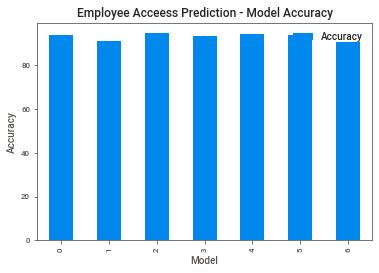

In [178]:
compare.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Employee Acceess Prediction - Model Accuracy') 

In [224]:
EA_test=EA_test.drop('ID',axis=1)

In [227]:
rf = RandomForestClassifier()
rf.fit(X,Y)
Prediction = rf.predict(EA_test)

In [228]:
predictionlist=Prediction.tolist()
Passengerid=EA_test_copy['ID'].tolist() 
output=pd.DataFrame(list(zip(Passengerid, predictionlist)),
              columns=['ID','ACTION'])
output.head()

,ID,ACTION
0,18245,1
1,9226,1
2,27195,1
3,6478,1
4,4813,1


In [229]:
output.to_csv('submission.csv', index=False, header=False)